# Permケース

In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sklearn.linear_model as lm

%matplotlib inline

# Grid
* NX=160, NY=269 (=43,040)
* 1grid =50m
* 8000m, 13450m
* 26246ft, 44127 ft

In [254]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


![](1.PNG)
![](2.PNG)

# Permeability

In [255]:
CORE=pd.read_csv(r'excel-data\coreall.txt')

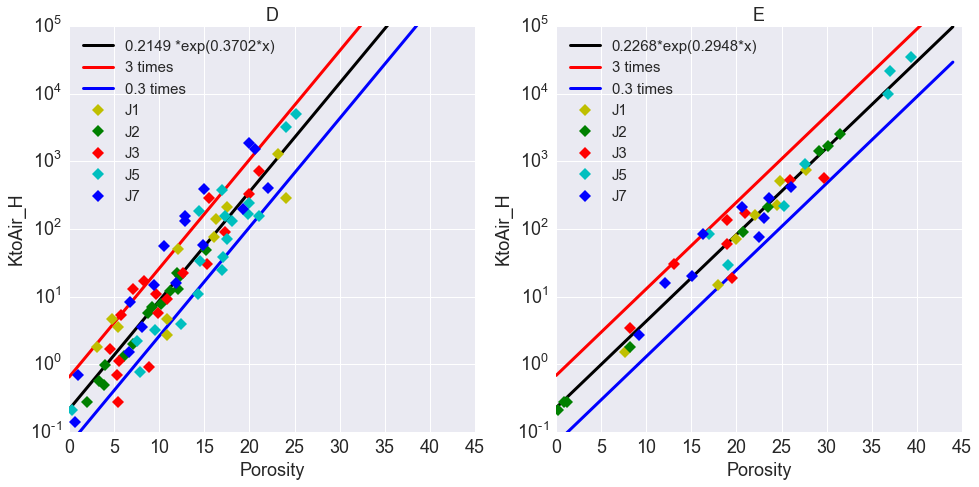

In [256]:
def graph(Layer, num):
    plt.subplot(num)
    plt.xlim(0,45)
    plt.ylim(0.1,100000)
    plt.grid("on")
    plt.xlabel('Porosity', fontsize=18)
    plt.ylabel('KtoAir_H', fontsize=18)
    plt.title(Layer, fontsize=18)
    plt.yscale('log')
        
    x= np.arange(0,45,1)
    if(Layer=='D'): 
        y= 0.2149 *np.exp(0.3702*x)
        ymax= 0.2149 *np.exp(0.3702*x)*3
        ymin= 0.2149 *np.exp(0.3702*x)*0.3
        name='0.2149 *exp(0.3702*x)'
    if(Layer=='E'): 
        y= 0.2268*np.exp(0.2948*x)
        ymax= 0.2268*np.exp(0.2948*x)*3
        ymin= 0.2268*np.exp(0.2948*x)*0.3
        name='0.2268*exp(0.2948*x)'
    plt.plot(x, y, '-k',label=name, linewidth=3)     
    plt.plot(x, ymax, '-r',label='3 times', linewidth=3)     
    plt.plot(x, ymin, '-b',label='0.3 times', linewidth=3)     
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

    for well, color in [('J1', 'Dy'), ('J2', 'Dg'), ('J3', 'Dr'), ('J5', 'Dc'), ('J7', 'Db')]:
        xwell=CORE.Poro[(CORE.Well==well) & (CORE.Layer== Layer)]
        ywell=CORE.KtoAir_H[(CORE.Well==well) & (CORE.Layer== Layer)]
        plt.plot(xwell, ywell, color, label=well, ms=9)
        
    plt.legend(loc=2,prop={'size':15})

plt.figure(figsize=(16,16))
for a, b in [('D', 221), ('E', 222)]:
    graph(a, b)
    
plt.savefig("PORO-PERM.PNG")    

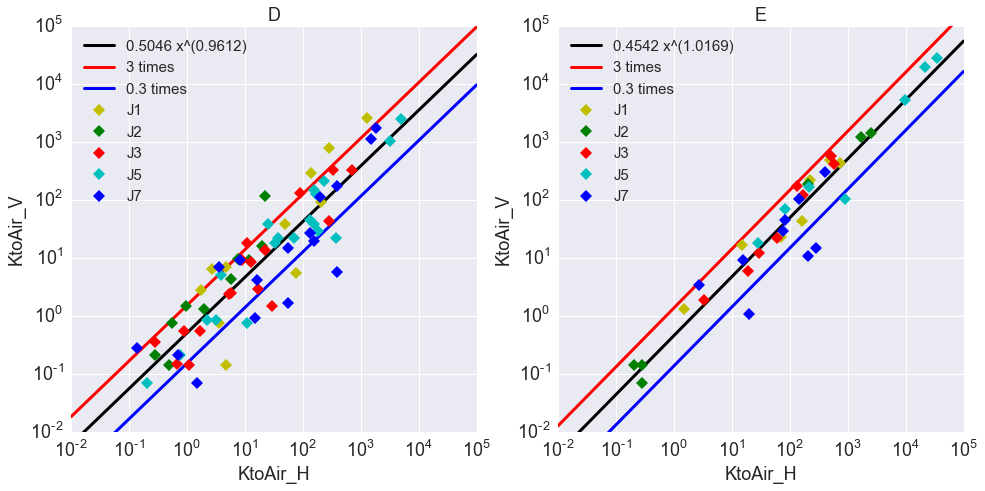

In [257]:
def graph(Layer, num):
    plt.subplot(num)
    plt.xlim(0.01,100000)
    plt.ylim(0.01,100000)
    plt.grid("on")
    plt.xlabel('KtoAir_H', fontsize=18)
    plt.ylabel('KtoAir_V', fontsize=18)
    plt.title(Layer, fontsize=18)
    plt.yscale('log')
    plt.xscale('log')

    x= np.arange(0.01,100000,10)
    if(Layer=='D'): 
        y= 0.5046* x**0.9612
        ymax= 0.5046* x**0.9612 *3
        ymin= 0.5046* x**0.9612 *0.3
        name='0.5046 x^(0.9612)'
    if(Layer=='E'): 
        y= 0.4542* x**1.0169
        ymax= 0.4542* x**1.0169 *3
        ymin= 0.4542* x**1.0169 *0.3
        name='0.4542 x^(1.0169)'
    plt.plot(x, y, '-k',label=name, linewidth=3)         
    plt.plot(x, ymax, '-r',label='3 times', linewidth=3)
    plt.plot(x, ymin, '-b',label='0.3 times', linewidth=3)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    
    for well, color in [('J1', 'Dy'), ('J2', 'Dg'), ('J3', 'Dr'), ('J5', 'Dc'), ('J7', 'Db')]:
        xwell=CORE.KtoAir_H[(CORE.Well==well) & (CORE.Layer== Layer)]
        ywell=CORE.KtoAir_V[(CORE.Well==well) & (CORE.Layer== Layer)]
        plt.plot(xwell, ywell, color, label=well, ms=9)       


    plt.legend(loc=2,prop={'size':15})
    
plt.figure(figsize=(16,16))
for a, b in [('D', 221), ('E', 222)]:
    graph(a, b)
    

# Poro-Perm & KvKh

In [258]:
## Poro-Perm
def fncP(Z, P):
    if (Z<=3):
        return 0.2149*np.exp(0.3702*P)*0.691
    elif (Z>=5):
        return 0.2268*np.exp(0.2948*P)*0.691
    else: 
        return 0


## KvKh
def fnKvKh(Z, P):
    if (Z<=3):
        return 0.5046*np.power(P, 0.9612)
    elif (Z>=5):
        return 0.4542*np.power(P, 1.0169)
    else: 
        return 0

# Seed 指定

In [259]:
seed='690169'
#eed='190169'
#eed='290169'
#eed='390169'
#eed='490169'
#eed='590169'
#eed='790169'
#eed='890169'
#seed='990169'

INPORO = 'poro_all_seed' + seed + '.txt'
OUTPERMI = 'permI_all_seed' + seed + '.txt'
OUTPERMK = 'permK_all_seed' + seed + '.txt'

# sGs Porosity 読み込み

In [260]:
#softori=pd.read_csv(r'soft\rotsoft_all.txt')
softori=pd.read_csv(r'soft\rotsoft_all_eye2.txt')

softori['I']=(softori.index - (softori.z-1)*NX*NY) % NX
softori['J']=(softori.index - (softori.z-1)*NX*NY) // NX
softori=softori.drop('poro',1)
softori=softori.drop('ngr',1)

c=pd.read_csv(INPORO) # sGs porosity読み込み
c=c.rename(columns={'POR ALL': 'poro'})

softori['poro']=c.round(4)*100 # sGs porosity入れ替え(パーセント)

print('SoftData Number= %d, 1-Layer=%d' % (len(softori), len(softori)/7))
softori.head(1)

SoftData Number= 301280, 1-Layer=43040


,x0f,y0f,z,depth,thickness,D4E,GEOEASz,I,J,poro
0,82.02,82.02,1,9546.34,7.93848,D,1,0,0,13.61


# J-well Permeability (Hard Data)

In [261]:
hardJ=pd.read_csv(r'hard\hard_all.txt')
hardJ.poro = hardJ.poro.round(2)
hardJ['JWELL']='J' + (hardJ.index%7+1).astype(str)
hardJ['PERM']=pd.Series(np.vectorize(fncP)(hardJ['z'], hardJ['poro']) , index=hardJ.index)

hardJ.PERM = hardJ.PERM.round(2)
hardJ['ModPERM']=hardJ['PERM']

hardJ=hardJ.sort_values(by=['JWELL', 'z'], ascending=True).reset_index(drop=True)

print('J-well Perm Number= %d, 1-Layer=%d' % (len(hardJ), len(hardJ)/7))
hardJ.head(1)

J-well Perm Number= 49, 1-Layer=7


,x0f,y0f,z,depth,poro,ngr,x,y,D4E,GEOEASz,JWELL,PERM,ModPERM
0,13746.34,18451.65,1,8182.5,16.05,0.8,56437.3,126708.7,D,1,J1,56.52,56.52


# A-well permeability (Hard data)

In [262]:
def AW(J, i, j):
    z1=softori[softori.index==160*269*(1-1)+ 160*(j-1)+i-1]
    z2=softori[softori.index==160*269*(2-1)+ 160*(j-1)+i-1]
    z3=softori[softori.index==160*269*(3-1)+ 160*(j-1)+i-1]
    z4=softori[softori.index==160*269*(4-1)+ 160*(j-1)+i-1]
    z5=softori[softori.index==160*269*(5-1)+ 160*(j-1)+i-1]
    z6=softori[softori.index==160*269*(6-1)+ 160*(j-1)+i-1]
    z7=softori[softori.index==160*269*(7-1)+ 160*(j-1)+i-1]

    s=  pd.concat([z1, z2, z3, z4, z5, z6, z7])
    s= s.reset_index(drop=True)
    s['AWELL']=J
    return   s

hardA=pd.concat([AW('A1', 69, 161),AW('A2', 84, 146), AW('A3',69, 131), AW('A4',69, 101), AW('A5',84, 86)])
hardA=hardA.reset_index(drop=True)


hardA['PERM']=pd.Series(np.vectorize(fncP)(hardA['z'], hardA['poro']) , index=hardA.index)
hardA.PERM =hardA.PERM.round(2)
hardA['ModPERM']=hardA['PERM']

print('A-well Perm Number= %d, 1-Layer=%d' % (len(hardA), len(hardA)/7))
hardA.head(1)

A-well Perm Number= 35, 1-Layer=5


,x0f,y0f,z,depth,thickness,D4E,GEOEASz,I,J,poro,AWELL,PERM,ModPERM
0,11236.88,26328.74,1,8624.36,5.37866,D,1,68,160,13.56,A1,22.48,22.48


# Soft data コントロールポイント数

In [263]:
num=9
displacement=4

cx = list('')
for i in range(NX):
    if (i%num==displacement): 
        cx.append(i)
print (len(cx))
print (cx)

cy = list('')
for i in range(NY):
    if (i%num==displacement): 
        cy.append(i)
print (len(cy))
print (cy)
print (len(cx)*len(cy))

18
[4, 13, 22, 31, 40, 49, 58, 67, 76, 85, 94, 103, 112, 121, 130, 139, 148, 157]
30
[4, 13, 22, 31, 40, 49, 58, 67, 76, 85, 94, 103, 112, 121, 130, 139, 148, 157, 166, 175, 184, 193, 202, 211, 220, 229, 238, 247, 256, 265]
540


In [264]:
def SOFT(i, j):
    return softori[(softori.I==cx[i]) & (softori.J==cy[j])].reset_index(drop=True)


a = pd.DataFrame()
for j in range(len(cy)):
    for i in range(len(cx)):
        c=SOFT(i,j)
        a= pd.concat([a,c])

soft=a.reset_index(drop=True)

soft['PERM']=pd.Series(np.vectorize(fncP)(soft['z'], soft['poro']) , index=soft.index)
soft.PERM =soft.PERM.round(2)
soft['Mod'] =1.0
soft['ModPERM']=soft['PERM']

print('SoftData Perm Number= %d, 1-Layer=%d' % (len(soft), len(soft)/7))
soft.head(1)

SoftData Perm Number= 3780, 1-Layer=540


,x0f,y0f,z,depth,thickness,D4E,GEOEASz,I,J,poro,PERM,Mod,ModPERM
0,738.19,738.19,1,9529.06,7.8667,D,1,4,4,13.99,26.36,1.0,26.36


# Hard & Soft data の図

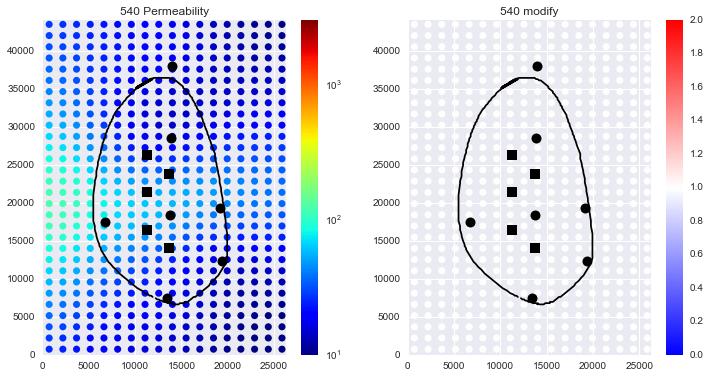

In [265]:
import matplotlib.colors as colors
checkz=1
plt.figure(figsize=(12,6))
plt.subplot(121)
#owc=pd.read_csv(r'owc\OWC-ORI.txt')
owc=pd.read_csv(r'owc\GRIDTOP-Z6-ORI.txt', delim_whitespace=True)
#plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].PERM, cmap='jet', s=50, edgecolors='')#, vmin = 0.0, vmax = 100)
plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].PERM, cmap='jet', s=50, edgecolors='', norm=colors.LogNorm(vmin=10, vmax=3000))
plt.plot(hardJ.x0f[hardJ.z==checkz], hardJ.y0f[hardJ.z==checkz], 'ok', ms=10)
plt.plot(hardA.x0f[hardA.z==checkz], hardA.y0f[hardA.z==checkz], 'sk', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.PERM>=0)])
plt.title(str(num1) + ' Permeability')

plt.subplot(122)
plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].Mod, cmap='bwr', s=50, edgecolors='', vmin = 0.0, vmax = 2.0)
plt.plot(hardJ.x0f[hardJ.z==checkz], hardJ.y0f[hardJ.z==checkz], 'ok', ms=10)
plt.plot(hardA.x0f[hardA.z==checkz], hardA.y0f[hardA.z==checkz], 'sk', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.PERM>=0)])
plt.title(str(num1) + ' modify')
#plt.savefig("PERM.PNG")

# Permeability modification (SoftData)
## soft dataの倍率変更

In [266]:
soft.columns
soft.head(3)

,x0f,y0f,z,depth,thickness,D4E,GEOEASz,I,J,poro,PERM,Mod,ModPERM
0,738.19,738.19,1,9529.06,7.86670,D,1,4,4,13.99,26.36,1.0,26.36
1,738.19,738.19,2,9536.92,7.86694,D,2,4,4,18.02,117.19,1.0,117.19
2,738.19,738.19,3,9544.79,7.86670,D,3,4,4,15.74,50.39,1.0,50.39


In [267]:
def perm(maxperm, ix, d4e, mod):
    l=soft.index[(soft.PERM>maxperm) & (soft.I>= ix) & (soft.D4E==d4e)]
    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod
                
#perm(0, 121, 'E', 0.5)

def modpermdepthab(deep, shallow, a, b, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J<= a* soft.I +b) ]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod
        
def modpermdepthabc(deep, shallow, a, b, c, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J>= a* (soft.I - b)**2 + c)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod
        
        
def modpermdepthabcde(deep, shallow, a, b, c, d, e, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J<= a* (soft.I - b)**2 + c) & (soft.J<= d* soft.I +e)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod

def modpermdepthabcd(deep, shallow, a, b, c, d, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J<= a* soft.I + b) & (soft.J<= c* soft.I +d)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod

def modpermdepthabcd2(deep, shallow, a, b, c, d, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J>= a* soft.I + b) & (soft.J>= c* soft.I +d)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod

def modpermdepthabcd3(deep, shallow, a, b, c, d, e, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J>= a* soft.I + b) & (soft.J<= c* soft.I +d) & (soft.I > e)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod

def modpermdepthab(deep, shallow, a, b, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & ((soft.J<= a) | (soft.I>= b))]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod

def modpermdepthaband(deep, shallow, a, b, d4e, mod):
    l=soft.index[(soft.depth<deep) & (soft.depth>shallow) & (soft.D4E==d4e) & (soft.J<= a) & (soft.I>= b)]

    for i in range(len(l)):
        ijk=l[i]
        soft.ix[ijk,'Mod'] = mod
        soft.ix[ijk,'ModPERM'] = soft.ix[ijk,'PERM'] * mod
        
modpermdepthab(903000, 9030, 130, 90, 'E', 0.3)
#modpermdepthaband(903000, 9030, 100, 50, 'D', 0.5)
    
#modpermdepthabcd(903000, 9030, 1.4, -10, 0.0, 165, 'E', 0.3)
#modpermdepthabcd(903000, 0, 1.4, 10000, 0.0, 165000, 'D', 1.6)

#modpermdepthabcd(9030, 0, 0.6, 20, 0, 165, 'D', 1.8)

#modpermdepthabcd(903000, 9030, 0.6, 20, 0, 165, 'D', 0.5)
#modpermdepthabcd3(903000, 9030, 0.0, 90, 0, 165, 100, 'D', 0.5)


#modpermdepthabcd(9030, 0, 0.6, 20, 0, 165, 'E', 1.8)

#modpermdepthabcd(903000, 9030, 0.6, 20, 0, 165, 'E', 0.3)
#modpermdepthabcd3(903000, 9030, 0.0, 90, 0, 165, 100, 'E', 0.3)

#modpermdepthabcd2(903000, 0, 0.0, 165, -5, 560, 'E', 0.7)


# 倍率Hard & Soft data の図

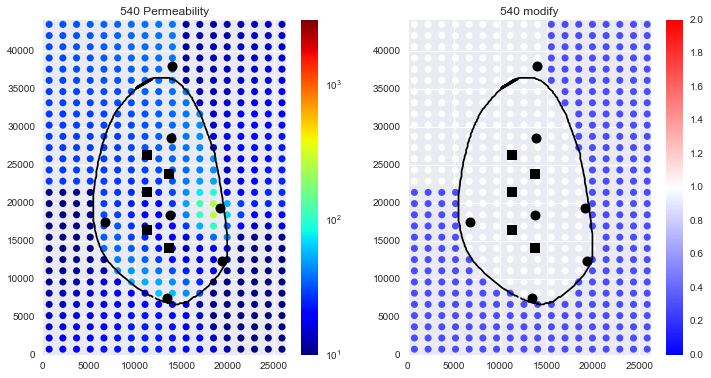

In [268]:
checkz=5
plt.figure(figsize=(12,6))
plt.subplot(121)
#owc=pd.read_csv(r'owc\OWC-ORI.txt')
owc=pd.read_csv(r'owc\GRIDTOP-Z6-ORI.txt', delim_whitespace=True)
#plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].ModPERM, cmap='jet', s=50, edgecolors='')#, vmin = 0.0, vmax = 100)
plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].ModPERM, cmap='jet', s=50, edgecolors='', norm=colors.LogNorm(vmin=10, vmax=3000))
plt.plot(hardJ.x0f[hardJ.z==checkz], hardJ.y0f[hardJ.z==checkz], 'ok', ms=10)
plt.plot(hardA.x0f[hardA.z==checkz], hardA.y0f[hardA.z==checkz], 'sk', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.PERM>=0)])
plt.title(str(num1) + ' Permeability')

plt.subplot(122)
xx = np.arange(0, 265, 1)
yy=0.0* xx + 130
#plt.plot(xx*164.042,yy*164.042)

#plt.plot(0*xx+90*164.042,xx*164.042)

yy2=0.0* xx + 100
#plt.plot(xx*164.042,yy2*164.042)

#plt.plot(0*xx+50*164.042,xx*164.042)


plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].Mod, cmap='bwr', s=50, edgecolors='', vmin = 0.0, vmax = 2)
plt.plot(hardJ.x0f[hardJ.z==checkz], hardJ.y0f[hardJ.z==checkz], 'ok', ms=10)
plt.plot(hardA.x0f[hardA.z==checkz], hardA.y0f[hardA.z==checkz], 'sk', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.PERM>=0)])
plt.title(str(num1) + ' modify')
#plt.savefig("PERM.PNG")

# Permeability modification (J-well)

In [269]:
def modpermJ(d4e,w,mod):
    ijk=hardJ[(hardJ.D4E==d4e) & (hardJ.JWELL==w)].index
    hardJ.ix[ijk,'ModPERM'] = hardJ.ix[ijk,'PERM'] * mod

modpermJ('D','J1', 1.0)  # J1 D
modpermJ('E','J1', 1.0)  # J1 E

modpermJ('D','J2', 1.0)  # J2 D
modpermJ('E','J2', 1.0)  # J2 E

modpermJ('D','J3', 1.0)  # J3 D
modpermJ('E','J3', 1.0)  # J3 E

modpermJ('D','J4', 1.0)  # J4 D
modpermJ('E','J4', 1.0)  # J4 E

modpermJ('D','J5', 1.0)  # J5 D
modpermJ('E','J5', 1.0)  # J5 E

modpermJ('D','J6', 1.0)  # J6 D
modpermJ('E','J6', 1.0)  # J6 E

modpermJ('D','J7', 1.0)  # J7 D
modpermJ('E','J7', 1.0)  # J7 E

hardJ[hardJ.PERM!=hardJ.ModPERM]

,x0f,y0f,z,depth,poro,ngr,x,y,D4E,GEOEASz,JWELL,PERM,ModPERM


# Permeability modification (A-well)

In [270]:
def modpermA(d4e,w,mod):
    ijk=hardA[(hardA.D4E==d4e) & (hardA.AWELL==w)].index
    hardA.ix[ijk,'ModPERM'] = hardA.ix[ijk,'PERM'] * mod

modpermA('D','A1', 1.0)  # A1 D
modpermA('E','A1', 1.0)  # A1 E

modpermA('D','A2', 1.0)  # A2 D
modpermA('E','A2', 1.0)  # A2 E

modpermA('D','A3', 1.0)  # A3 D
modpermA('E','A3', 1.0)  # A3 E

modpermA('D','A4', 1.0)  # A4 D
modpermA('E','A4', 1.0)  # A4 E

modpermA('D','A5', 1.0)  # A5 D
modpermA('E','A5', 1.0)  # A5 E

hardA[hardA.PERM!=hardA.ModPERM]

,x0f,y0f,z,depth,thickness,D4E,GEOEASz,I,J,poro,AWELL,PERM,ModPERM


# Porosity vs Permeability

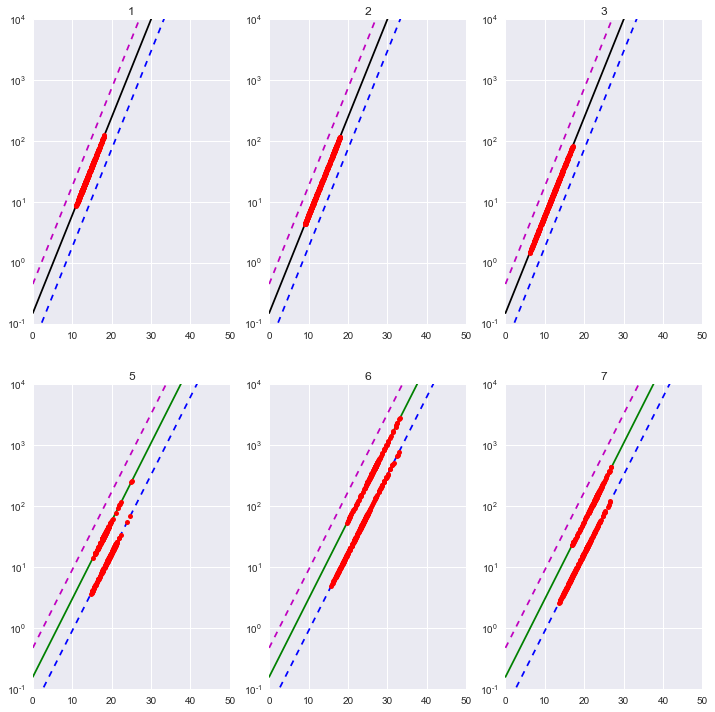

In [271]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)

    xx=np.arange(0.0, 50, 1)
    yyd = 0.2149*np.exp(0.3702*xx)*0.691
    yydmax = 0.2149*np.exp(0.3702*xx)*0.691*3.0
    yydmin = 0.2149*np.exp(0.3702*xx)*0.691*0.3
    yye = 0.2268*np.exp(0.2948*xx)*0.691
    yyemax = 0.2268*np.exp(0.2948*xx)*0.691*3.0
    yyemin = 0.2268*np.exp(0.2948*xx)*0.691*0.3
    if(g<=3):
        plt.plot(xx,yyd, '-k')
        plt.plot(xx,yydmax, '--m')
        plt.plot(xx,yydmin, '--b')
    else:
        plt.plot(xx,yye, '-g')
        plt.plot(xx,yyemax, '--m')
        plt.plot(xx,yyemin, '--b')
        
    x=soft[soft.z==g].poro#.reset_index(drop=True)
    y=soft[soft.z==g].ModPERM#.reset_index(drop=True)
    plt.plot(x,y, 'or', ms=5)
        
    plt.xlim(0,50)
    plt.ylim(0.1,10000)    
    plt.yscale('log')
    plt.title(g)

# Geo-EASデータ作成

In [272]:
def make_dat(folder, file, z1, z2, z3, wh, ws):
    filein  = folder + r'\\' + r'base\PERM_XYZ.dat'
    fileout = folder + r'\\' + file + '.dat'

    fi = open(filein,'r')
    fo = open(fileout,'w')
    
    for row in fi:
        fo.writelines(row)

    fi.close()
    fo.close()
        
    
    HJ=hardJ[(hardJ.z==z1) | (hardJ.z==z2) | (hardJ.z==z3)].reset_index(drop=True)
    HJ=HJ.assign(s1=[-1.0]*len(HJ))
    HJ=HJ.assign(w1=[wh]*len(HJ))
    HJ=HJ.rename(columns={'ModPERM':'p1'})
    if (z1==z2 and z2==z3 ): HJ.GEOEASz = 1 
    HJ=HJ[['x0f', 'y0f', 'GEOEASz', 'p1', 's1', 'w1']]

    HA=hardA[(hardA.z==z1) | (hardA.z==z2) | (hardA.z==z3)].reset_index(drop=True)
    HA=HA.assign(s1=[-1.0]*len(HA))
    HA=HA.assign(w1=[wh]*len(HA))
    HA=HA.rename(columns={'ModPERM':'p1'})
    if (z1==z2 and z2==z3 ): HA.GEOEASz = 1 
    HA=HA[['x0f', 'y0f', 'GEOEASz', 'p1', 's1', 'w1']]
    
    
    S=soft[((soft.z==z1) | (soft.z==z2) | (soft.z==z3)) & (soft['x0f'] >0)].reset_index(drop=True)
    S=S.assign(s1=[-1.0]*len(S))
    S=S.rename(columns={'ModPERM':'p1'})
    #S=S.assign(p1=[-1.0]*len(S))
    #S=S.rename(columns={'poro':'s1'})
    S=S.assign(w1=[ws]*len(S))
    if (z1==z2 and z2==z3 ): S.GEOEASz = 1 
    S=S[['x0f', 'y0f', 'GEOEASz', 'p1', 's1', 'w1']]

    xyz=pd.concat([HJ,HA, S]).reset_index(drop=True)
    
    xyz.to_csv(fileout, index=False, header=False, sep=' ', mode='a')


make_dat('RUN_PERM', 'DpermXYZ', 1, 2, 3, 1.0, 0.5)
make_dat('RUN_PERM', 'EpermXYZ', 5, 6, 7, 1.0, 0.5)

# .Parデータ作成 

In [273]:
def sgsim(F, file, xyzv, nz, ktype, sec, nug, sill, range_radii):
    
    filedat=F + r'/' + file + r'.dat'
    outtrn=F + r'/' + file + r'.trn'
    outdbg=F + r'/' + file + r'.dbg'
    outout=F + r'/' + file + r'.out'
    
    fo = open(F + r'\\' + file + r'.par', 'w')
    
    
    L0 ='                  Parameters for SGSIM'
    L1 ='                  ********************'
    L2 =''
    L3 ='START OF PARAMETERS:'
    L4 = filedat                               #-  file with data
    L5 = xyzv                                  #-  columns for X,Y,Z,vr,wt,sec.var.'
    L6 ='-1.0       1.0e21'                    #-  trimming limits
    L7 ='1'                                    #-  transform the data (0=no, 1=yes)
    L8 = outtrn                                #-  file for output trans table
    L9 ='0'                                    #-  consider ref. dist (0=no, 1=yes)
    L10='histsmth.out'                         #-  file with ref. dist distribution
    L11='1  2'                                 #-  columns for vr and wt
    L12='0.0    2749.9'                       #-  zmin,zmax(tail extrapolation)
    L13='1      0.0'                           #-  lower tail option, parameter
    L14='1      0.0'                           #-  upper tail option, parameter
    L15='0'                                    #-  debugging level: 0,1,2,3
    L16= outdbg                                #-  file for debugging output
    L17= outout                                #-  file for simulation output
    L18='1'                                    #-  number of realizations to generate
    L19='160    82.021  164.042'               #-  nx,xmn,xsiz
    L20='269    82.021  164.042'               #-  ny,ymn,ysiz
    L21= str(nz) + '      1.0   1.0'           #-  nz,zmn,zsiz
    L22=seed                                   #-  random number seed
    L23='0     10000'                          #-  min and max original data for sim
    L24='16'                                   #-  number of simulated nodes to use
    L25='1'                                    #-  assign data to nodes (0=no, 1=yes)
    L26='1     3'                              #-  multiple grid search (0=no, 1=yes),num
    L27='0'                                    #-  maximum data per octant (0=not used)
    L28= range_radii                           #-  maximum search radii (hmax,hmin,vert)
    L29='0.0   0.0   0.0'                      #-  angles for search ellipsoid
    L30='51    51    11'                       #-  size of covariance lookup table
    L31=str(ktype) + '     0.60   1.0'         #-  ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC
    L32='Dataset/test.dat'                     #-  file with LVM, EXDR, or COLC variable
    L33= str(sec)                              #-  column for secondary variable
    L34='1  '+ str(nug)                        #-  nst, nugget effect
    L35='1  '+ str(sill) + ' 0.0  0.0  0.0'    #-  it,cc,ang1,ang2,ang3
    L36= range_radii                           #-  a_hmax, a_hmin, a_vert
    
    list1=[L0, L1, L2, L3, L4, L5, L6, L7, L8, L9]
    list2=[L10, L11, L12, L13, L14, L15, L16, L17, L18, L19]
    list3=[L20, L21, L22, L23, L24, L25, L26, L27, L28, L29]
    list4=[L30, L31, L32, L33, L34, L35, L36]
    lista=list1 + list2 + list3 + list4
    
    for i in range(len(lista)):
        fo.writelines(lista[i])
        fo.writelines('\n')

    

#sgsim(F, file, xyzv, nz, ktype, sec, nug, sill, range_radii):
sgsim('RUN_PERM', 'DpermXYZ', '1  2  3  4  6  5', 3, 1, 5, 0.0, 1.0, '50000 50000 10.0')
sgsim('RUN_PERM', 'EpermXYZ', '1  2  3  4  6  5', 3, 1, 5, 0.0, 1.0, '50000 50000 10.0')

# 実行run

In [274]:
os.system('sgsim.exe ' +r'RUN_PERM\\'+  'DpermXYZ.par')
os.system('sgsim.exe ' +r'RUN_PERM\\'+  'EpermXYZ.par')

0

# Permeability 出力

In [275]:
test=pd.read_csv(r'RUN_PERM\DpermXYZ.out').ix[2:]
test=pd.Series(test.values.flatten())
test=pd.to_numeric(test, errors='coerce')
PERMD=pd.DataFrame({
        'ModPERM': test,
        'z': test.index//(160*269)+1
    })

test=pd.read_csv(r'RUN_PERM\EpermXYZ.out').ix[2:]
test=pd.Series(test.values.flatten())
test=pd.to_numeric(test, errors='coerce')
PERME=pd.DataFrame({
        'ModPERM': test,
        'z': test.index//(160*269)+1+4
    })


PERM4=pd.DataFrame({
        'ModPERM': pd.Series([0]*160*269),
        'z': pd.Series([4]*160*269)
    })
SGSIM=pd.concat([PERMD, PERM4, PERME], ignore_index=True)
SGSIM['poro']=softori.poro

with open(OUTPERMI, 'w') as f:
    f.write('PERMI ALL\n')

SGSIM.ModPERM.to_csv(OUTPERMI, index=False, mode='a')

print('sGs Perm Number= %d, 1-Layer=%d' % (len(SGSIM), len(SGSIM)/7))
SGSIM.head(1)

sGs Perm Number= 301280, 1-Layer=43040


,ModPERM,z,poro
0,23.120554,1,13.61


# D層(1,2,3) とE層(5,6,7)のsGs PERMEABILITY
* z(ft)ではなく、z(grid)で実施しているが、これでよいのか？
* Range, serach radii=50000ft, 10ft
* Nugget=0.0
* Sill=1.0
* kriging type (1=OK)

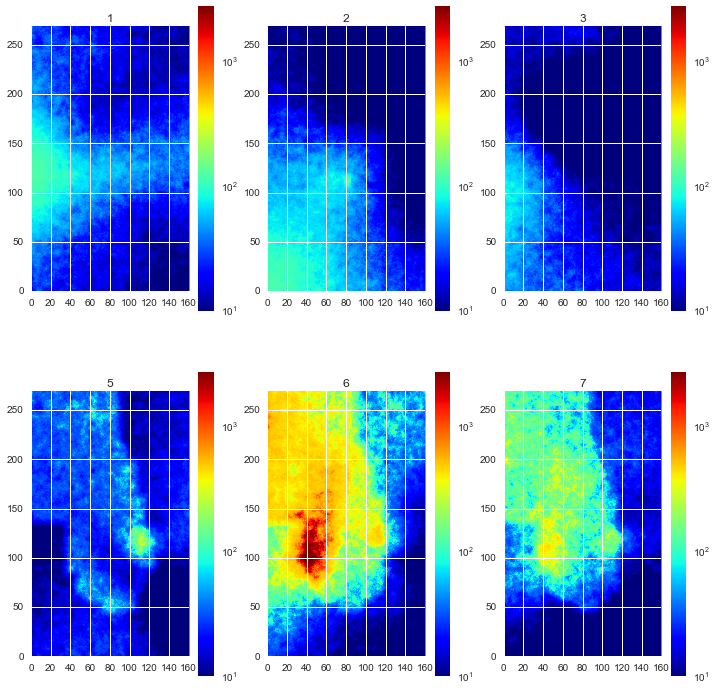

In [276]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)
    graph=SGSIM[SGSIM.z==g].ModPERM
    #graph=np.log10(graph)
    graph=graph.reshape(NY,NX)
    #plt.imshow(graph, interpolation='nearest', cmap='jet', vmin = 0.0, vmax = 4)
    plt.imshow(graph, interpolation='nearest', cmap='jet', norm=colors.LogNorm(vmin=10, vmax=2750))
        
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    plt.title(g)

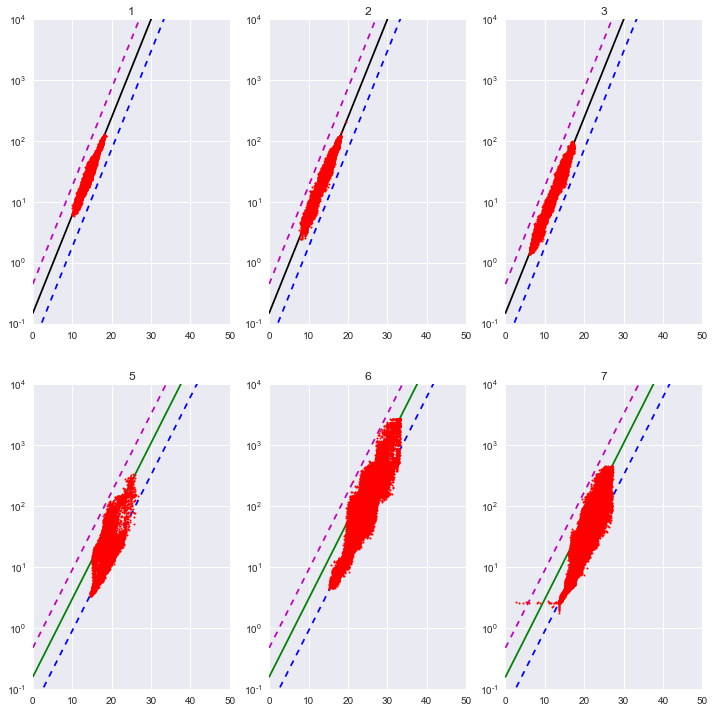

In [277]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)

    xx=np.arange(0.0, 50, 1)
    yyd = 0.2149*np.exp(0.3702*xx)*0.691
    yydmax = 0.2149*np.exp(0.3702*xx)*0.691*3.0
    yydmin = 0.2149*np.exp(0.3702*xx)*0.691*0.3
    yye = 0.2268*np.exp(0.2948*xx)*0.691
    yyemax = 0.2268*np.exp(0.2948*xx)*0.691*3.0
    yyemin = 0.2268*np.exp(0.2948*xx)*0.691*0.3
    if(g<=3):
        plt.plot(xx,yyd, '-k')
        plt.plot(xx,yydmax, '--m')
        plt.plot(xx,yydmin, '--b')
    else:
        plt.plot(xx,yye, '-g')
        plt.plot(xx,yyemax, '--m')
        plt.plot(xx,yyemin, '--b')

    x=SGSIM[SGSIM.z==g].poro
    y=SGSIM[SGSIM.z==g].ModPERM
    plt.plot(x,y, 'or', ms=2)        
        
    plt.xlim(0,50)
    plt.ylim(0.1,10000)    
    plt.yscale('log')
    plt.title(g)
    
plt.savefig("PORO-ModPERM.PNG")

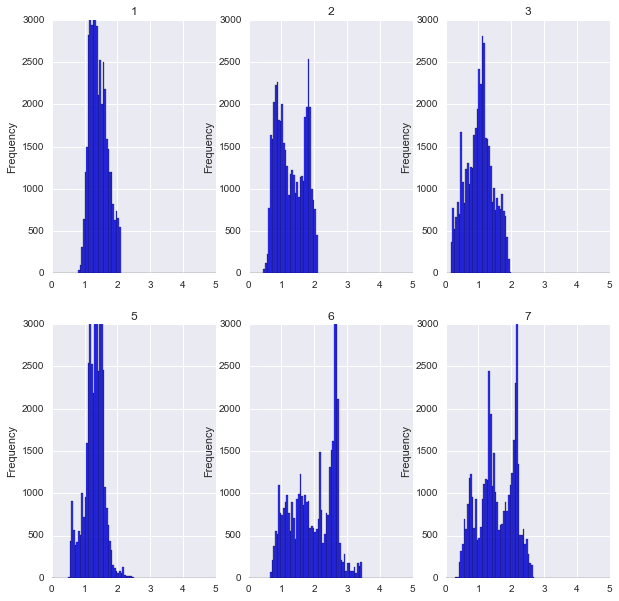

In [278]:
plt.figure(figsize=(10,10))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)
    graph=SGSIM[SGSIM.z==g].ModPERM
    graph=np.log10(graph)
    graph.plot.hist(bins=100,range=(0,5), alpha=0.8, color='b')
    #graph.plot.hist(bins=100, alpha=0.8, color='b')
        
    #plt.xlim(0,NX)
    plt.ylim(0.1,3000)    
    plt.title(g)

In [279]:
SGSIM.describe()

,ModPERM,z,poro
count,301280.000000,301280.000000,301280.000000
mean,61.064643,4.000000,14.614415
std,154.838878,2.000003,7.674200
min,0.000000,1.000000,0.000000
25%,6.951683,2.000000,11.250000
50%,18.889999,4.000000,15.410000
75%,45.508388,6.000000,19.780000
max,2749.899900,7.000000,33.270000


# KvKh

In [280]:
permk = pd.Series(np.vectorize(fnKvKh)(SGSIM['z'], SGSIM['ModPERM']) , index=SGSIM.index)
permk = permk.round(2)

kvkh=pd.DataFrame({
        'PERMK': permk,
        'PERMI': SGSIM['ModPERM'],
        'z': SGSIM['z']
    })

with open(OUTPERMK, 'w') as f:
    f.write('PERMK ALL\n')
    
permk.to_csv(OUTPERMK, index=False, mode='a')

print('KvKh PermK Number= %d, 1-Layer=%d' % (len(kvkh), len(kvkh)/7))
kvkh.head(1)

KvKh PermK Number= 301280, 1-Layer=43040


,PERMI,PERMK,z
0,23.120554,10.33,1


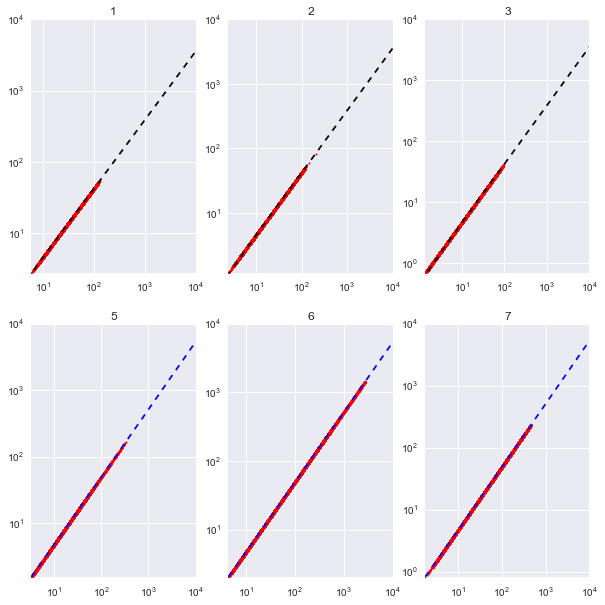

In [281]:
plt.figure(figsize=(10,10))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)
    x=kvkh[kvkh.z==g].PERMI
    y=kvkh[kvkh.z==g].PERMK
    plt.plot(x,y, 'or', ms=2)
    xx=np.arange(0.0, 10000, 10)
    yyd = 0.5046*np.power(xx, 0.9612)
    yy3 = 0.4542*np.power(xx, 1.0169)
    if(g<=3):
        plt.plot(xx,yyd, '--k')
    else:
        plt.plot(xx,yy3, '--b')
        
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0,10000)
    plt.ylim(0,10000)
    plt.title(g)
    
#plt.savefig("PORO-ModPERM.PNG")

# 以下は坑井でのPermeability check

# sGs permeability (J-well)

In [282]:
def WW(well, i, j):
    z1=SGSIM[SGSIM.index==160*269*(1-1)+ 160*(j-1)+i-1]
    z2=SGSIM[SGSIM.index==160*269*(2-1)+ 160*(j-1)+i-1]
    z3=SGSIM[SGSIM.index==160*269*(3-1)+ 160*(j-1)+i-1]
    z4=SGSIM[SGSIM.index==160*269*(4-1)+ 160*(j-1)+i-1]
    z5=SGSIM[SGSIM.index==160*269*(5-1)+ 160*(j-1)+i-1]
    z6=SGSIM[SGSIM.index==160*269*(6-1)+ 160*(j-1)+i-1]
    z7=SGSIM[SGSIM.index==160*269*(7-1)+ 160*(j-1)+i-1]

    s=  pd.concat([z1, z2, z3, z4, z5, z6, z7])
    s= s.reset_index(drop=True)
    s['Well']=well
    return   s

SGSIM_J=pd.concat([WW('J1', 84, 113),WW('J2', 85, 175), WW('J3',118, 76), WW('J4',86, 233), WW('J5',41, 107), WW('J6',117, 119), WW('J7',82, 46)])
SGSIM_J.ModPERM =SGSIM_J.ModPERM.round(2)

test=pd.DataFrame({
        'L1':SGSIM_J.ModPERM[SGSIM_J.z==1].reset_index(drop=True),
        'L2':SGSIM_J.ModPERM[SGSIM_J.z==2].reset_index(drop=True),
        'L3':SGSIM_J.ModPERM[SGSIM_J.z==3].reset_index(drop=True),
        'L4':SGSIM_J.ModPERM[SGSIM_J.z==4].reset_index(drop=True),
        'L5':SGSIM_J.ModPERM[SGSIM_J.z==5].reset_index(drop=True),
        'L6':SGSIM_J.ModPERM[SGSIM_J.z==6].reset_index(drop=True),
        'L7':SGSIM_J.ModPERM[SGSIM_J.z==7].reset_index(drop=True),
        })
test=test.T

th=test.rename(columns={0: 'J1',1: 'J2', 2: 'J3', 3: 'J4', 4: 'J5', 5: 'J6', 6: 'J7'})
th

,J1,J2,J3,J4,J5,J6,J7
L1,56.52,16.53,15.18,18.14,74.33,44.76,18.82
L2,202.69,7.32,14.21,7.60,51.90,12.07,52.29
L3,10.49,1.38,10.41,8.59,39.61,8.65,19.32
L4,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L5,22.18,36.29,14.90,39.19,32.35,292.61,63.17
L6,227.75,389.47,70.04,288.33,2749.89,448.67,56.98
L7,87.89,146.36,29.18,94.05,438.22,193.66,25.18


# 初期permeability (J-well)

In [283]:
test=pd.DataFrame({
        'L1':hardJ.PERM[hardJ.z==1].reset_index(drop=True),
        'L2':hardJ.PERM[hardJ.z==2].reset_index(drop=True),
        'L3':hardJ.PERM[hardJ.z==3].reset_index(drop=True),
        'L4':hardJ.PERM[hardJ.z==4].reset_index(drop=True),
        'L5':hardJ.PERM[hardJ.z==5].reset_index(drop=True),
        'L6':hardJ.PERM[hardJ.z==6].reset_index(drop=True),
        'L7':hardJ.PERM[hardJ.z==7].reset_index(drop=True),
        })
test=test.T

th=test.rename(columns={0: 'J1',1: 'J2', 2: 'J3', 3: 'J4', 4: 'J5', 5: 'J6', 6: 'J7'})
th

,J1,J2,J3,J4,J5,J6,J7
L1,56.52,16.53,15.18,18.14,74.33,44.76,18.82
L2,202.69,7.32,14.21,7.60,51.90,12.07,52.29
L3,10.49,1.38,10.41,8.59,39.61,8.65,19.32
L4,0.00,0.00,0.00,0.00,0.00,0.00,0.00
L5,22.18,36.29,14.90,39.19,32.35,292.61,63.17
L6,227.75,389.47,70.04,288.33,2749.89,448.67,56.98
L7,87.89,146.36,29.18,94.05,438.22,193.66,25.18


# sGs permeability (A-well)

In [284]:
test=pd.DataFrame({
        'L1':hardA.ModPERM[hardA.z==1].reset_index(drop=True),
        'L2':hardA.ModPERM[hardA.z==2].reset_index(drop=True),
        'L3':hardA.ModPERM[hardA.z==3].reset_index(drop=True),
        'L4':hardA.ModPERM[hardA.z==4].reset_index(drop=True),
        'L5':hardA.ModPERM[hardA.z==5].reset_index(drop=True),
        'L6':hardA.ModPERM[hardA.z==6].reset_index(drop=True),
        'L7':hardA.ModPERM[hardA.z==7].reset_index(drop=True),
        })
test=test.T

ah=test.rename(columns={0: 'A1',1: 'A2', 2: 'A3', 3: 'A4', 4: 'A5'})
ah

,A1,A2,A3,A4,A5
L1,22.48,41.26,57.78,53.07,31.26
L2,20.80,34.54,56.31,67.76,51.14
L3,2.02,3.00,7.63,18.41,14.31
L4,0.00,0.00,0.00,0.00,0.00
L5,30.77,33.72,24.89,22.85,18.53
L6,526.10,409.49,513.84,383.77,145.93
L7,146.36,91.59,151.63,141.69,56.81


# 初期permeability (A-well)

In [285]:
SGSIM_A=pd.concat([WW('A1', 69, 161),WW('A2', 84, 146), WW('W3',69, 131), WW('A4',69, 101), WW('A5',84, 86)]) 
SGSIM_A.ModPERM =SGSIM_A.ModPERM.round(2)

test=pd.DataFrame({
        'L1':SGSIM_A.ModPERM[SGSIM_A.z==1].reset_index(drop=True),
        'L2':SGSIM_A.ModPERM[SGSIM_A.z==2].reset_index(drop=True),
        'L3':SGSIM_A.ModPERM[SGSIM_A.z==3].reset_index(drop=True),
        'L4':SGSIM_A.ModPERM[SGSIM_A.z==4].reset_index(drop=True),
        'L5':SGSIM_A.ModPERM[SGSIM_A.z==5].reset_index(drop=True),
        'L6':SGSIM_A.ModPERM[SGSIM_A.z==6].reset_index(drop=True),
        'L7':SGSIM_A.ModPERM[SGSIM_A.z==7].reset_index(drop=True),
        })
test=test.T

ah=test.rename(columns={0: 'A1',1: 'A2', 2: 'A3', 3: 'A4', 4: 'A5'})
ah

,A1,A2,A3,A4,A5
L1,22.48,41.26,57.78,53.07,31.26
L2,20.80,34.54,56.31,67.76,51.14
L3,2.02,3.00,7.63,18.41,14.31
L4,0.00,0.00,0.00,0.00,0.00
L5,30.77,33.72,24.89,22.85,18.53
L6,526.10,409.49,513.84,383.77,145.93
L7,146.36,91.59,151.63,141.69,56.81
